## *Classification with TensorFlow*

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.10.0


## *Creating data to view and fit*

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state= 42)

In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# See the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [ ]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
# Check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

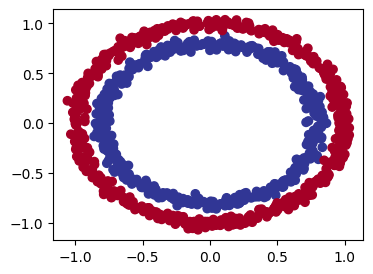

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Check how many samples we have
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## *Steps in modelling* 

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 3ms/step - loss: 6.5755 - accuracy: 0.4970
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 6.5280 - accuracy: 0.4980
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 5.4214 - accuracy: 0.5630
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 5.2447 - accuracy: 0.5300
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 5.7279 - accuracy: 0.5170


In [ ]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

## *Improving a model*
## ![image.png](attachment:image.png)

In [1]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

NameError: ignored

In [ ]:
# Evaluate the model
model_2.evaluate(X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  #plt.figure(figsize=(4,3))
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  
  

In [ ]:
plot_decision_boundary(model_3, X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train,
            epochs=100)

In [ ]:
model_3.summary()

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(4, 3))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

## *The missing piece: Non-linearity*
# ![LIN.png](attachment:LIN.png)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 6.6835 - accuracy: 0.4910
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.6667 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.6659 - accuracy: 0.4890
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.6657 - accuracy: 0.4890
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 6.6653 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 6.6650 - accuracy: 0.4890
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 6.6646 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 6.6642 - accuracy: 0.4890
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.6639 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.6636 - accuracy: 0.4890
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 6.1176 - accuracy: 0.4880
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1047 - accuracy: 0.4880
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0930 - accuracy: 0.4890
Epoch 86/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0884 - accuracy: 0.4900
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0785 - accuracy: 0.4890
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0724 - accuracy: 0.4890
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0703 - accuracy: 0.4890
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0591 - accuracy: 0.4890
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0436 - accuracy: 0.4880
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0423 - accuracy: 0.4880
Epoch 93/100


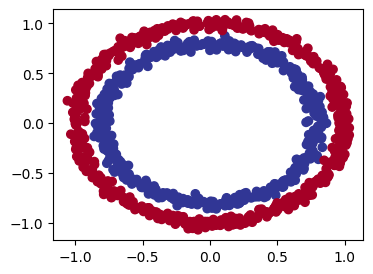

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


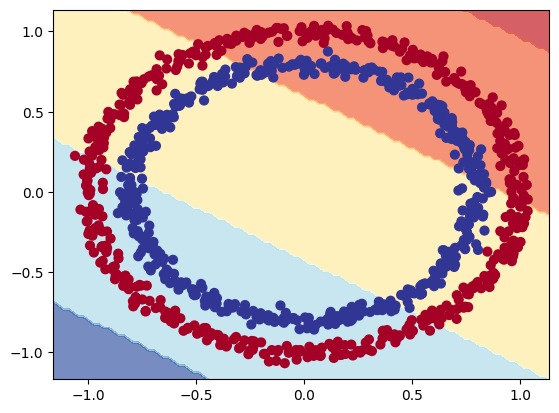

In [ ]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

# ![RELU.png](attachment:RELU.png)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer 
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 5.4241 - accuracy: 0.4780
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 5.2259 - accuracy: 0.4780
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.9070 - accuracy: 0.4760
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6008 - accuracy: 0.4720
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5053 - accuracy: 0.4700
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4848 - accuracy: 0.4680
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4757 - accuracy: 0.4670
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4688 - accuracy: 0.4660
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4634 - accuracy: 0.4650
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4585 - accuracy: 0.4660
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.8866 - accuracy: 0.4660
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8825 - accuracy: 0.4650
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8784 - accuracy: 0.4660
Epoch 86/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8745 - accuracy: 0.4660
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8705 - accuracy: 0.4670
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8664 - accuracy: 0.4670
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8623 - accuracy: 0.4660
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8582 - accuracy: 0.4670
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8540 - accuracy: 0.4680
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8498 - accuracy: 0.4670
Epoch 93/100


# ![RELU2.png](attachment:RELU2.png)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100


D:\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 1s 4ms/step - loss: 4.7710 - accuracy: 0.4270
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.7130 - accuracy: 0.4430
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.6345 - accuracy: 0.4490
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.5202 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3921 - accuracy: 0.4700
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2252 - accuracy: 0.4760
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0620 - accuracy: 0.4770
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9371 - accuracy: 0.4790
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 3.6938 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 3.4492 - accuracy: 0.4820
Epoch 11/100
32/32 [=

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6390 - accuracy: 0.6500


[0.6389703750610352, 0.6499999761581421]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


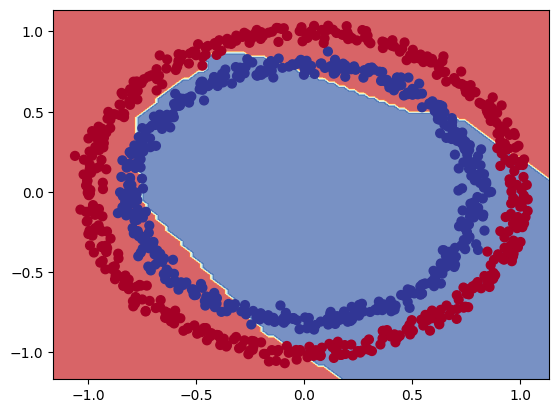

In [ ]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

# ![RELU3.png](attachment:RELU3.png)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.2298 - accuracy: 0.9920


[0.2297956794500351, 0.9919999837875366]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


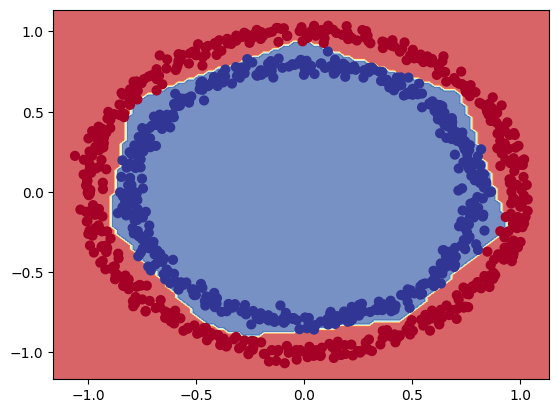

In [ ]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

In [ ]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

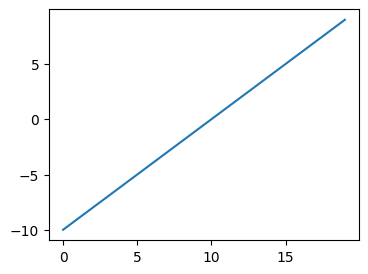

In [ ]:
# Visualize our toy tensor
plt.figure(figsize=(4,3))
plt.plot(A);

In [ ]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

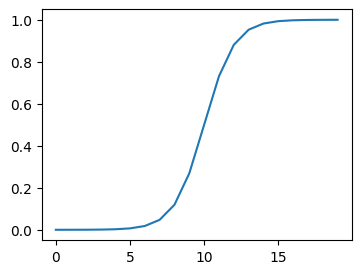

In [ ]:
# Plot sigmoid modified tensor
plt.figure(figsize=(4,3))
plt.plot(sigmoid(A));

In [ ]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

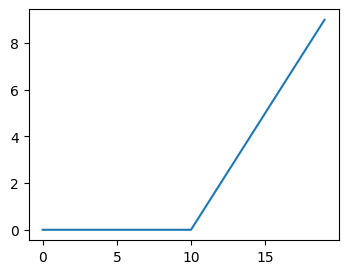

In [ ]:
# Plot sigmoid modified tensor
plt.figure(figsize=(4,3))
plt.plot(relu(A));

In [ ]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## *Evaluating and improving our classification model* 

In [ ]:
# How many examples are in the whole dataset?
len(X)

1000

In [ ]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 

((800, 2), (200, 2))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4913
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5288
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5688
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.6125
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.6450
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6412 - accuracy: 0.6875
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6091 - accuracy: 0.8250
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.7975
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4912 - accuracy: 0.9225
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4103 - accuracy: 0.9725
Epoch 11/25
25/25 [

In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9950
Model loss on the test set: 0.047067128121852875
Model accuracy on the test set: 99.50%


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


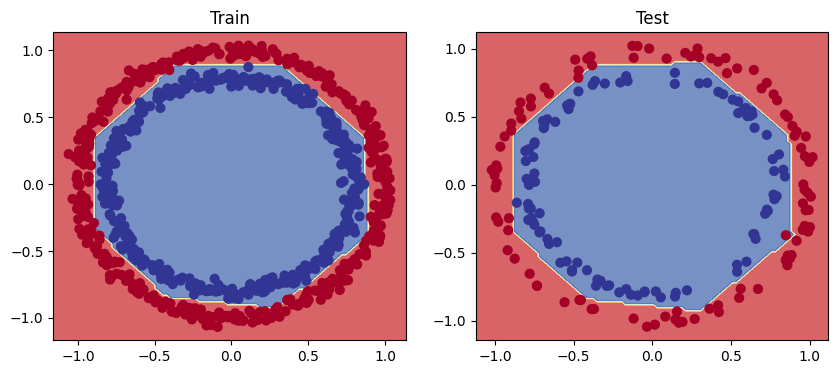

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

##*Plot the loss curve* 

In [ ]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.695587,0.49125
1,0.688995,0.52875
2,0.683572,0.56875
3,0.676686,0.61250
4,0.664704,0.64500
5,0.641211,0.68750
6,0.609051,0.82500
7,0.562679,0.79750
8,0.491166,0.92250
9,0.410306,0.97250


Text(0.5, 1.0, 'Model_8 training curves')

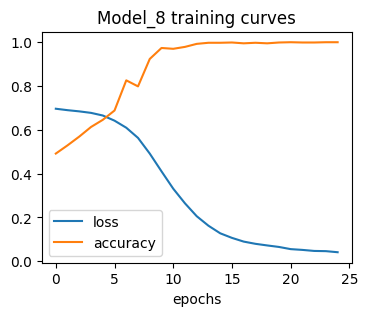

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot(figsize=(4,3), xlabel='epochs')
plt.title("Model_8 training curves")

## *Finding the best learning rate* 

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.4938 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7004 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.4975 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6996 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.4888 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

Epoch 73/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.8062 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5486 - accuracy: 0.6900 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5080 - accuracy: 0.7125 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5724 - accuracy: 0.6825 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.7775 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6044 - accuracy: 0.6488 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6300 - accuracy: 0.6212 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7094 - accuracy: 0.4938 - lr: 0.8913
Epoch 81/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7128 - accuracy: 0.5

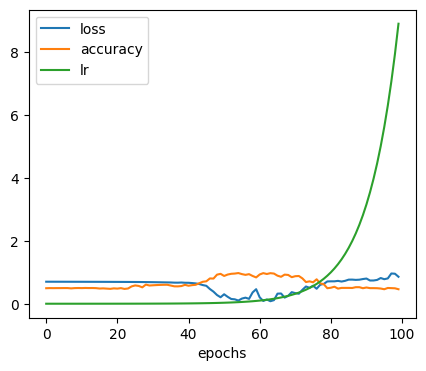

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(5,4), xlabel="epochs");

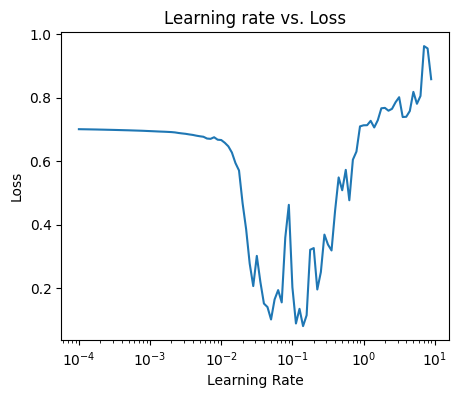

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(5, 4))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [ ]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

D:\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.4762
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5075
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6731 - accuracy: 0.5800
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6511 - accuracy: 0.6450
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6222 - accuracy: 0.6488
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5666 - accuracy: 0.7462
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5067 - accuracy: 0.7887
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4489 - accuracy: 0.8175
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4187 - accuracy: 0.8400
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3892 - accuracy: 0.8562
Epoch 11/20
25/25 [

In [ ]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2502 - accuracy: 0.9200


[0.25017666816711426, 0.9200000166893005]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


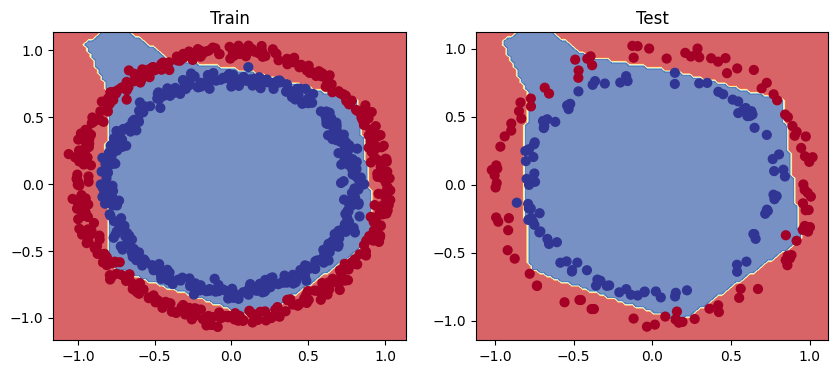

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.9200
Model loss on test set: 0.25017666816711426
Model accuracy on test set: 92.00%


In [ ]:
y_test, y_preds

NameError: name 'y_preds' is not defined

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
# View the first 10 predictions
y_preds[:10]

array([[0.66540027],
       [0.66540027],
       [0.66540027],
       [0.66540027],
       [0.66540027],
       [0.06855198],
       [0.66540027],
       [0.11358549],
       [0.66540027],
       [0.66540027]], dtype=float32)

In [ ]:
# View the first 10 test labels
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[43, 58],
       [ 1, 98]], dtype=int64)

 ## *confusion matrix*

[[101]
 [ 99]]
AxesImage(50,44;248x308)
49.5
86
15
1
98


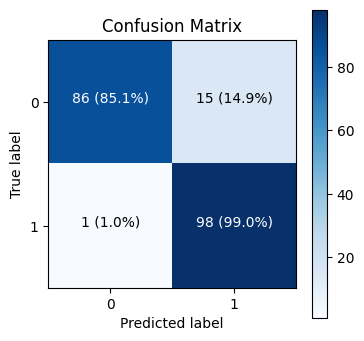

In [ ]:
import itertools

figsize = (4, 4)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis= 1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

print(cm.sum(axis= 1)[:, np.newaxis])

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

print(cax)

# Create classes
classes = False

if classes:
  labels = classes
  
else:
  labels = np.arange(cm.shape[0])


#labels= range(0,2)
# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
ax.title.set_size(12)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.
print(threshold)

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=10)
  
  print(cm[i,j])

In [ ]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
  print(i, j)

0 0
0 1
1 0
1 1


## *Working with a larger example (multiclass classification)* 

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[2]}\n") 
print(f"Training label: {train_labels[2]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0  22 118  24   0   0   0   0   0  48
   88   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  12 100 212 205 185 179 173 186 193 221
  142  85   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  85  76 199 225 248 255 238 226 157
   68  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  91  69  91 201 218 225 209 158  61
   93  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  79  89  61  59  87 108  75  56  76
   97  73   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  75  89  80  80  67  63  73  83  80
   96  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  77  88  77  80  83  83  83  83  81
   95  76   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  89  96  80  83  81  84  85  85  85
   97  84   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  93  97  

In [ ]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# Check shape of a single example
train_data[20].shape, train_labels[20].shape

((28, 28), ())

Label Of Image: 9


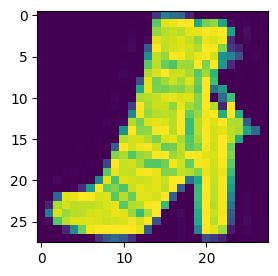

In [ ]:
# Plot a single example
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.imshow(train_data[11])
print('Label Of Image:' ,train_labels[11])

In [ ]:
train_labels[7]

2

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

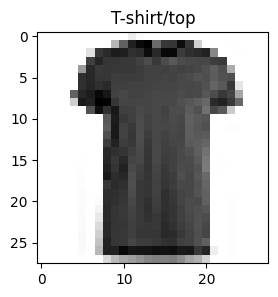

In [ ]:
# Plot an example image and its label
plt.figure(figsize=(4,3))
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

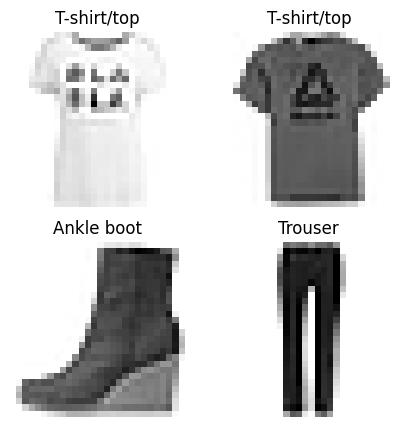

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(5, 5))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5009 - accuracy: 0.0983 - val_loss: 2.3056 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3029 - accuracy: 0.0984 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3043 - val_accuracy: 0.0999
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3043 - val_accuracy:

In [ ]:
# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size, we'll cover this in a later module
model_11.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 4)                 3140      
                                                                 
 dense_42 (Dense)            (None, 4)                 20        
                                                                 
 dense_43 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

##*scaling / normalization*

In [ ]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4713 - accuracy: 0.3836 - val_loss: 1.2592 - val_accuracy: 0.4700
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1737 - accuracy: 0.5227 - val_loss: 1.0771 - val_accuracy: 0.6131
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9608 - accuracy: 0.6677 - val_loss: 0.9126 - val_accuracy: 0.6976
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8568 - accuracy: 0.7135 - val_loss: 0.8398 - val_accuracy: 0.7279
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8015 - accuracy: 0.7332 - val_loss: 0.7946 - val_accuracy: 0.7370
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7668 - accuracy: 0.7413 - val_loss: 0.7915 - val_accuracy: 0.7339
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7442 - accuracy: 0.7475 - val_loss: 0.7837 - val_accuracy:

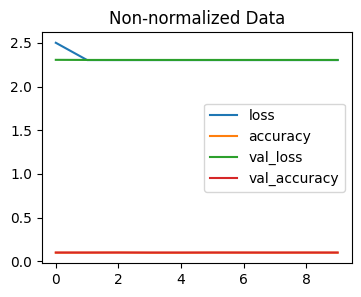

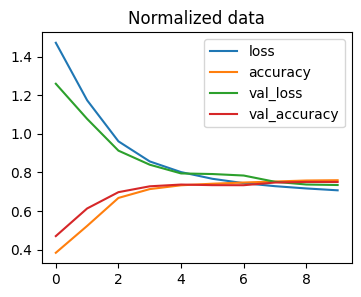

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(figsize=(4,3), title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(figsize=(4,3), title="Normalized data");

##*Try to find learning rate* 

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2111 - accuracy: 0.5444 - val_loss: 0.8703 - val_accuracy: 0.6565 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7648 - accuracy: 0.7226 - val_loss: 0.7286 - val_accuracy: 0.7396 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6837 - accuracy: 0.7546 - val_loss: 0.6837 - val_accuracy: 0.7562 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6494 - accuracy: 0.7674 - val_loss: 0.6513 - val_accuracy: 0.7708 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6281 - accuracy: 0.7767 - val_loss: 0.6425 - val_accuracy: 0.7733 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6140 - accuracy: 0.7825 - val_loss: 0.6479 - val_accuracy: 0.7728 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

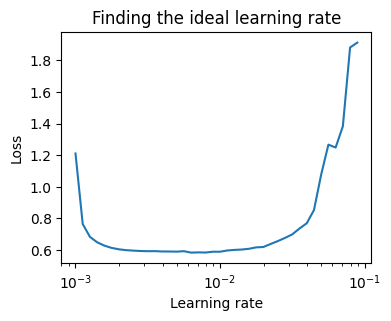

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.figure(figsize=(4,3))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2843 - accuracy: 0.5586 - val_loss: 0.9591 - val_accuracy: 0.6552
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8609 - accuracy: 0.6826 - val_loss: 0.8804 - val_accuracy: 0.6654
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7726 - accuracy: 0.7095 - val_loss: 0.7706 - val_accuracy: 0.7135
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7193 - accuracy: 0.7440 - val_loss: 0.7357 - val_accuracy: 0.7424
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6783 - accuracy: 0.7648 - val_loss: 0.7015 - val_accuracy: 0.7564
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6509 - accuracy: 0.7742 - val_loss: 0.6959 - val_accuracy: 0.7578
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6354 - accuracy: 0.7800 - val_loss: 0.6681 - val_accuracy:

## *confusion matrix*

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(6, 6), text_size=10): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:4]

313/313 [==============================] - 1s 1ms/step


array([[3.4360625e-03, 2.6897938e-04, 2.9161508e-04, 5.9754672e-03,
        8.2705281e-04, 1.0379769e-01, 2.7907735e-03, 5.7427436e-01,
        6.1979052e-03, 3.0214009e-01],
       [6.9118054e-03, 9.8009656e-10, 6.6093194e-01, 9.0178917e-05,
        1.5067386e-02, 3.7183085e-26, 3.1699857e-01, 0.0000000e+00,
        8.8204956e-08, 6.0595949e-31],
       [8.3672957e-10, 9.9985087e-01, 2.6017342e-06, 1.2558556e-04,
        2.0934878e-05, 4.7305688e-09, 5.1098943e-09, 0.0000000e+00,
        5.3030048e-15, 2.9869710e-17],
       [8.1600789e-11, 9.9990571e-01, 2.2573794e-07, 9.3404509e-05,
        6.3365582e-07, 2.3660887e-10, 1.1942117e-10, 0.0000000e+00,
        5.7749635e-18, 1.4304410e-17]], dtype=float32)

In [ ]:
# See the predicted class number and label for the first example
y_probs[2].argmax(), class_names[y_probs[2].argmax()]

(1, 'Trouser')

In [ ]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis= 1)

# View the first 10 prediction labels
y_preds

array([7, 2, 1, ..., 8, 1, 5], dtype=int64)

In [ ]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[735,   0,   9, 108,   4,   4, 120,   0,  20,   0],
       [  1, 941,   8,  42,   6,   0,   1,   0,   1,   0],
       [ 27,   2, 544,  34, 228,   0, 163,   0,   2,   0],
       [ 44,   8,  16, 848,  25,   4,  52,   0,   3,   0],
       [  1,   8,  88,  38, 763,   0,  98,   0,   4,   0],
       [  0,   0,   0,   1,   0, 857,   0,  99,   7,  36],
       [170,   2,  70,  71, 126,   4, 527,   0,  29,   1],
       [  0,   0,   0,   0,   0,  35,   0, 919,   0,  46],
       [  7,   0,   1,   5,   5,  33,  53,   2, 891,   3],
       [  1,   0,   0,   2,   0,  10,   1,  77,   0, 909]], dtype=int64)

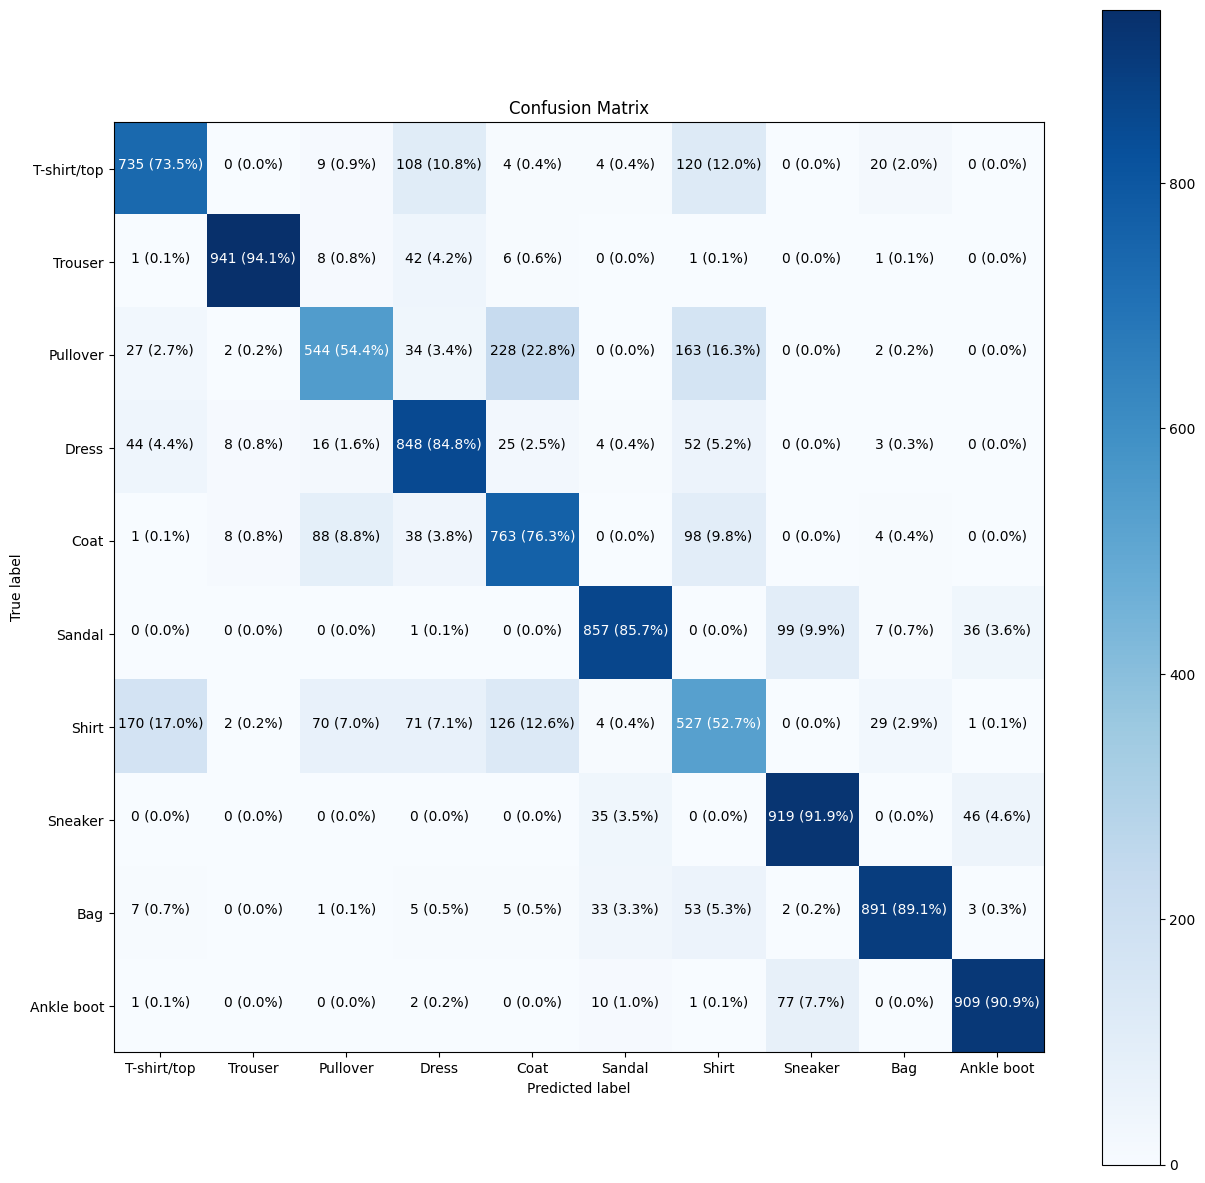

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

## *Prediction with label* 

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer(takes single value)
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  print(target_image) 
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]


  # Plot the target image
  plt.figure(figsize=(4,4))
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red
    

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.0117

1/1 [==============================] - 0s 23ms/step


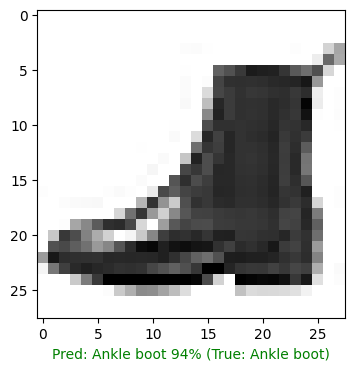

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

## *What patterns is our model learning?*
![image.png](attachment:image.png)

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 8.4713346e-01, -9.1553324e-01,  4.2573187e-01, -6.3868538e-03],
        [ 1.8104614e-01, -1.0287950e+00,  7.3084414e-01,  1.4203206e-02],
        [ 1.4452707e+00, -1.1041639e+00,  5.1709121e-01, -1.2369491e-02],
        ...,
        [-2.9933396e-01,  1.0615867e-03,  6.5578359e-01, -4.2810820e-02],
        [-7.2441399e-01,  3.8831940e-01,  1.0342556e+00,  6.6002160e-03],
        [ 7.5355418e-02, -3.5323325e-01,  7.6974839e-01, -1.4667161e-02]],
       dtype=float32),
 (784, 4))

In [ ]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([ 1.3081815 ,  2.3970041 ,  1.5761143 , -0.02869822], dtype=float32),
 (4,))

In [ ]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 4)                 3140      
                                                                 
 dense_38 (Dense)            (None, 4)                 20        
                                                                 
 dense_39 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
